# Software Grayscale and Sobel filters on HDMI input

This example notebook will demonstrate two image filters using a snapshot from the HDMI input: <br>
1. First, a frame is read from HDMI input
2. That image is saved and displayed in the notebook
3. Some simple Python pixel-level image processing is done (Gray Scale conversion, and Sobel filter)

## 1. Start the HDMI input
An HDMI input source is required for this example. This should be on, and connected to the board before running the code below.

In [1]:
from pynq.drivers.video import Frame, HDMI
from IPython.display import Image

hdmi=HDMI('in')
hdmi.start()

## 2. Save frame and display JPG here

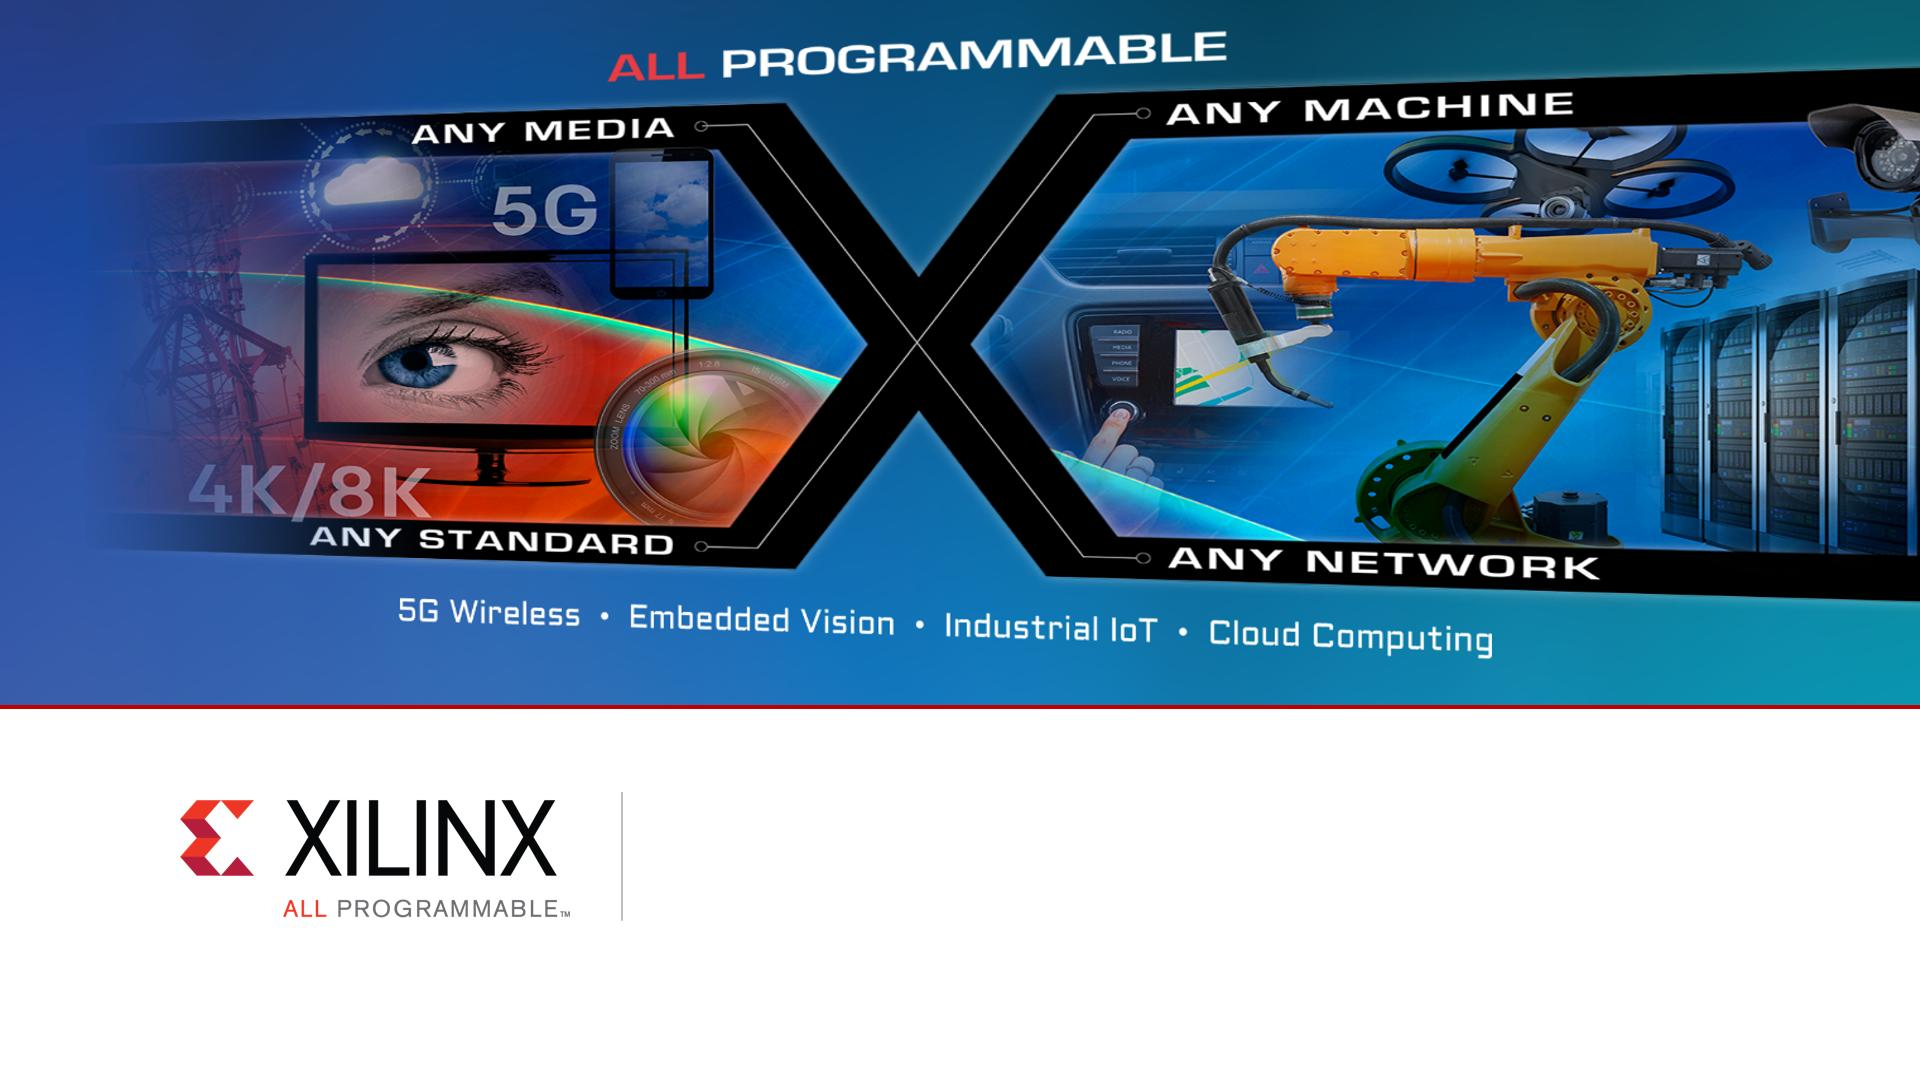

In [2]:
frame = hdmi.frame()
orig_img_path = '/home/xilinx/jupyter_notebooks/Examples/data/orig.jpg'
frame.save_as_jpeg(orig_img_path)

Image(filename=orig_img_path)

## 3. Gray Scale filter
Access the frame contents (a bytearray) directly for optimized processing time. This cell should take ~20s to complete.

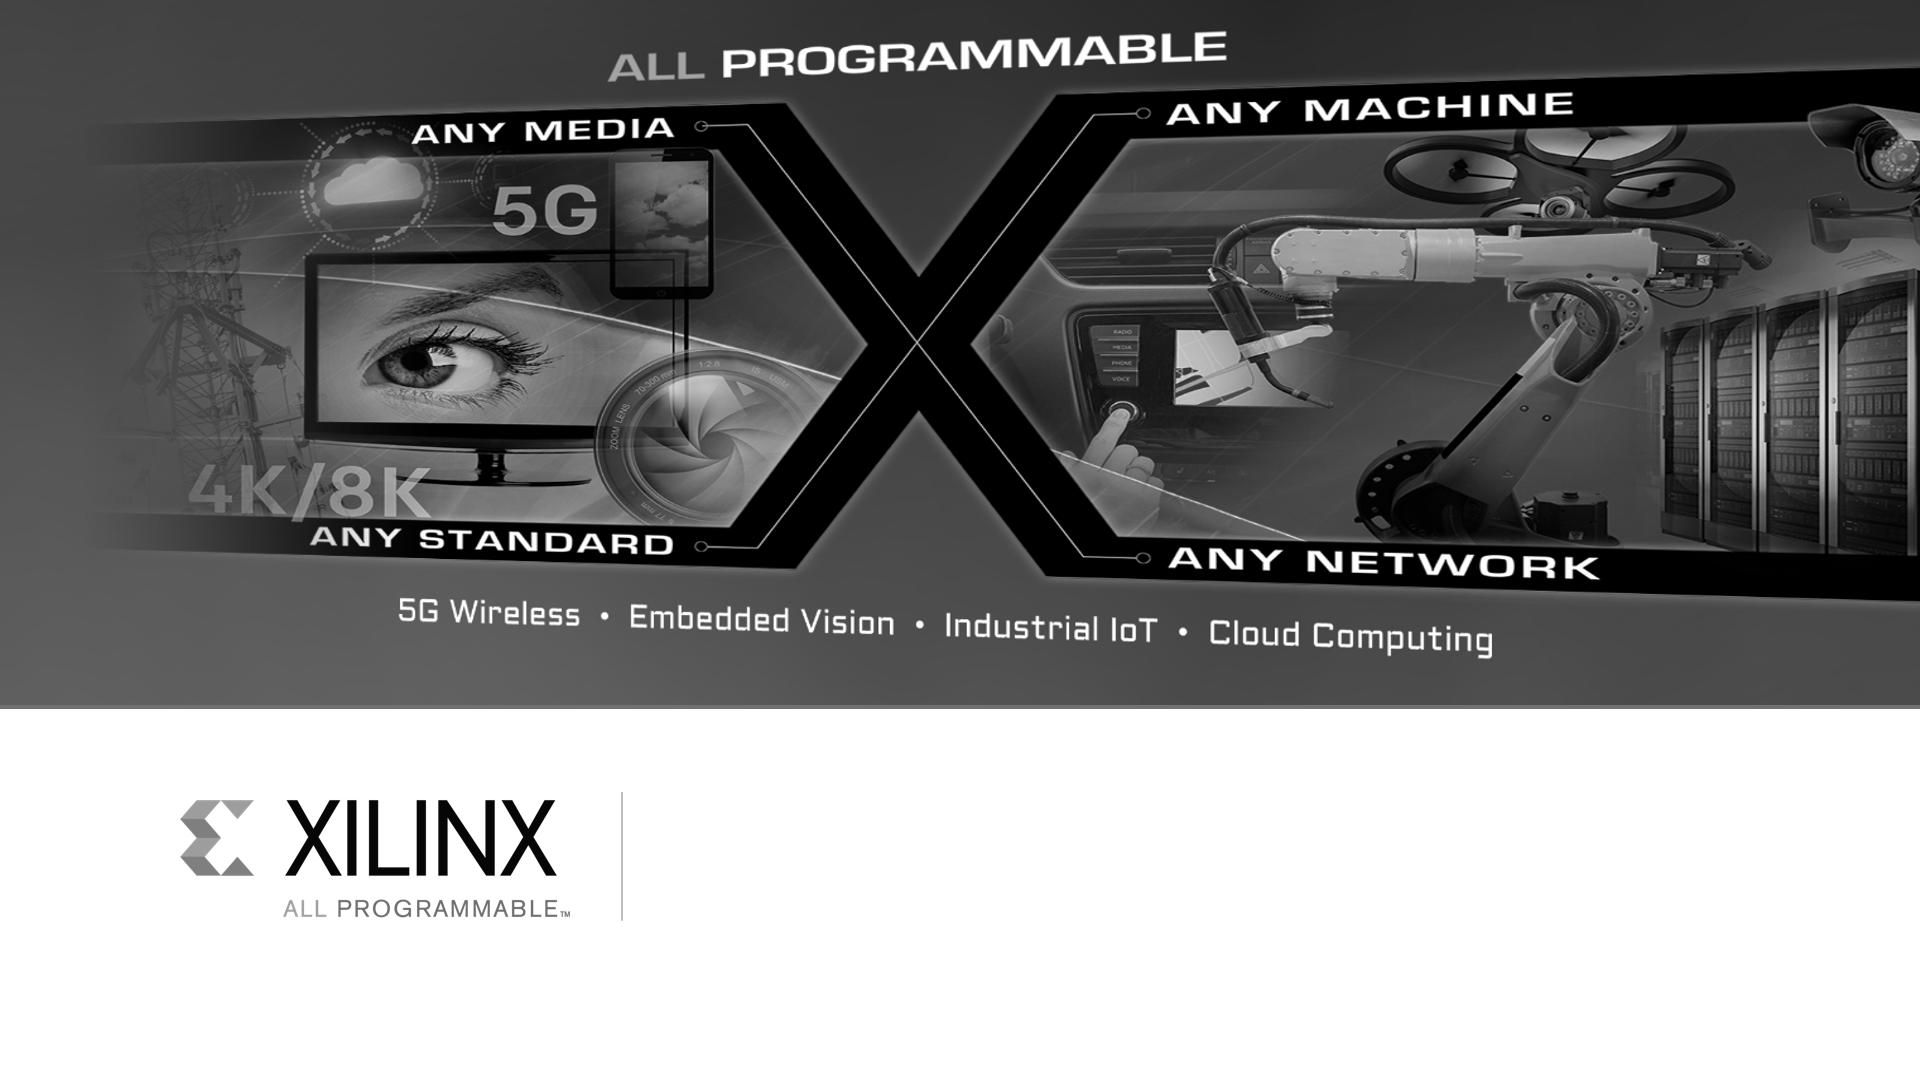

In [3]:
from pynq.drivers.video import MAX_FRAME_WIDTH

grayframe = frame
frame_i = grayframe.frame

height = hdmi.frame_height()
width = hdmi.frame_width()

for y in range(0, height):
    for x in range(0, width):
        
        offset = 3 * (y * MAX_FRAME_WIDTH + x)
        
        gray = round((0.299*frame_i[offset+2]) + 
                     (0.587*frame_i[offset+0]) +
                     (0.114*frame_i[offset+1]))
        frame_i[offset+0] = gray     
        frame_i[offset+1] = gray
        frame_i[offset+2] = gray

gray_img_path = '/home/xilinx/jupyter_notebooks/Examples/data/gray.jpg'
grayframe.save_as_jpeg(gray_img_path)
Image(filename=gray_img_path)

## 4. Sobel filter
Access the frame contents (a bytearray) directly for optimized processing time. This cell should take ~30s to complete.

Compute the Sobel Filter output with sobel operator:

$G_x=
\begin{bmatrix}
-1 & 0 & +1 \\
-2 & 0 & +2 \\
-1 & 0 & +1
\end{bmatrix}
$

$G_y=
\begin{bmatrix}
+1 & +2 & +1 \\
0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix}
$

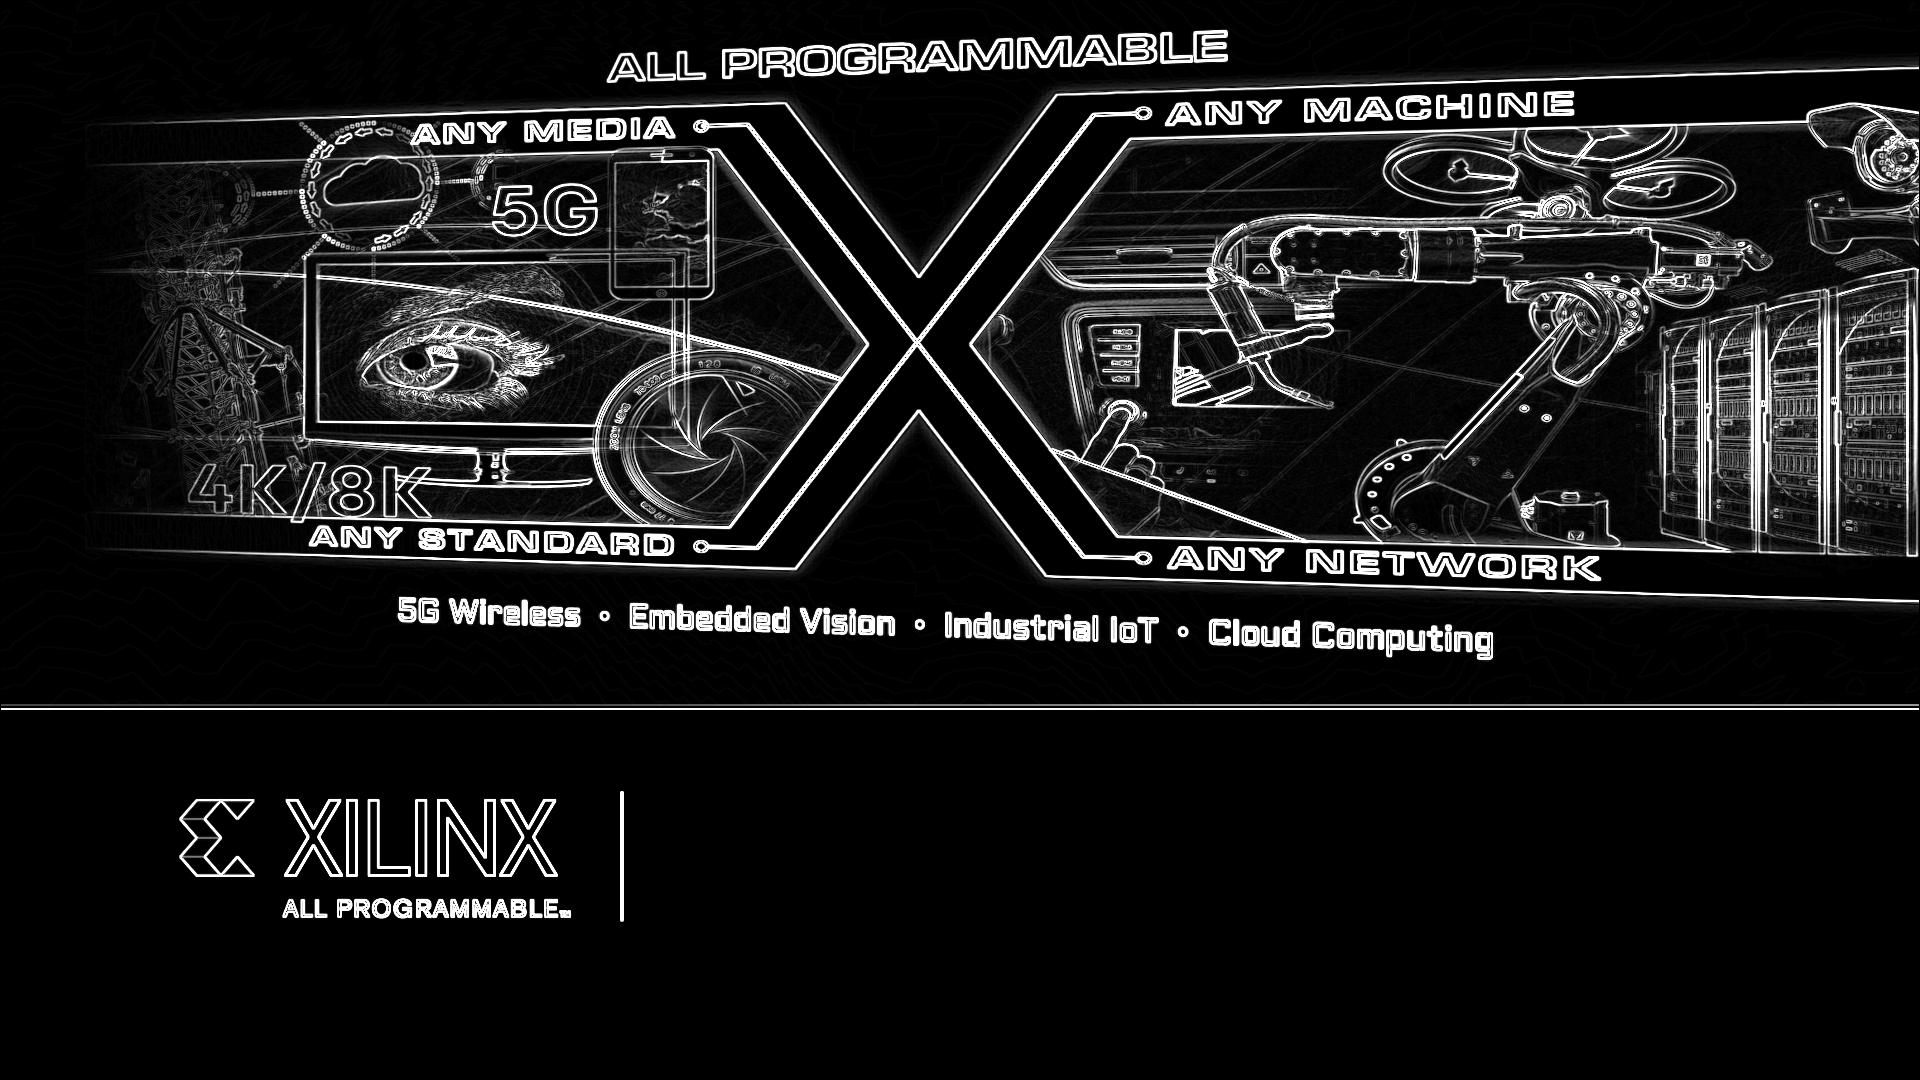

In [4]:
height = 1080
width = 1920
sobel = Frame(1920, 1080)
frame_i = frame.frame

for y in range(1,height-1):
    for x in range(1,width-1):
        
        offset = 3 * (y * MAX_FRAME_WIDTH + x)
        upper_row_offset = offset - MAX_FRAME_WIDTH*3
        lower_row_offset = offset + MAX_FRAME_WIDTH*3       
        
        gx = abs(-frame_i[lower_row_offset-3] + frame_i[lower_row_offset+3] -
                 2*frame_i[offset-3] + 2*frame_i[offset+3] -
                 frame_i[upper_row_offset-3] + frame_i[upper_row_offset+3])
        gy = abs(frame_i[lower_row_offset-3] + 2*frame_i[lower_row_offset] + 
                 frame_i[lower_row_offset+3] - frame_i[upper_row_offset-3] -
                 2*frame_i[upper_row_offset] - frame_i[upper_row_offset+3])        
       
        grad = gx + gy
        if grad > 255:
            grad = 255                    
        sobel.frame[offset+0] = grad     
        sobel.frame[offset+1] = grad
        sobel.frame[offset+2] = grad
        
sobel_img_path = '/home/xilinx/jupyter_notebooks/Examples/data/sobel.jpg'
sobel.save_as_jpeg(sobel_img_path)

Image(filename=sobel_img_path)

## Step 5: Free up space from different frames

In [5]:
hdmi.stop()

del sobel
del grayframe
del hdmi